### Homework 10

이번 과제에서는 고빈도 데이터 및 시장미시구조론을 기반으로 하는 모형에 대해 실습해 보도록 한다

#### 1. Data Import

Notion Database내의 `005930.txt`는 2017-04-24 ~ 2019-05-15동안의 삼성전자 1분 단위의 거래 정보를 기록한 것이다. 아래의 library를 이용해 데이터를 가져오라

In [1]:
import pandas as pd
import numpy as np

In [2]:
stock = pd.read_csv('005930.txt', index_col = 0)
stock.index = pd.to_datetime(stock.index)
stock.head(10)

,open,high,low,close,volume,sell,buy,kospi
date,,,,,,,,
2017-04-24 09:02:00,41200,41200,41180,41200,41700,12700.0,29000.0,2176.090088
2017-04-24 09:03:00,41200,41220,41180,41200,21750,5250.0,16500.0,2176.260010
2017-04-24 09:04:00,41200,41220,41200,41200,25450,6900.0,18550.0,2176.260010
2017-04-24 09:05:00,41200,41200,41140,41140,15350,7850.0,7500.0,2175.459961
2017-04-24 09:06:00,41140,41180,41140,41160,16450,6100.0,10350.0,2174.350098
2017-04-24 09:07:00,41140,41160,41080,41100,15750,12750.0,3000.0,2173.010010
2017-04-24 09:08:00,41080,41100,41040,41060,26000,21700.0,4300.0,2172.040039
2017-04-24 09:09:00,41080,41100,41040,41100,32050,7200.0,24850.0,2174.149902
2017-04-24 09:10:00,41100,41120,41080,41120,9000,450.0,8550.0,2174.810059


Text(0.5, 1.0, 'Samsung Electronics Stock Data')

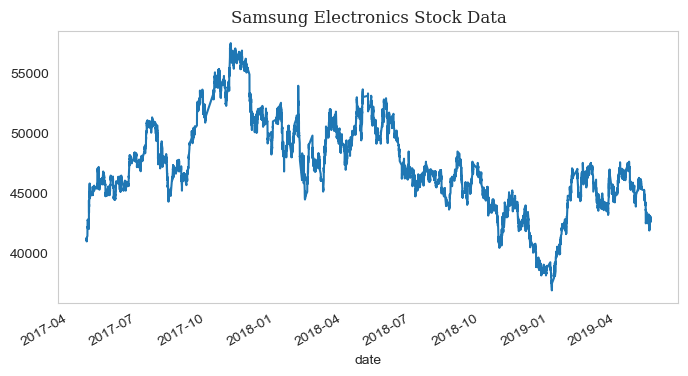

In [3]:
import matplotlib.pyplot as plt

stock.close.plot(figsize = (8, 4), grid = False)
plt.title("Samsung Electronics Stock Data", fontsize = 12, fontfamily = 'Serif')

#### 2. Tick Rule

close series에 대해 Tick Rule을 적용해 보자. 하락과 상승을 잘 잡아내는가?

In [4]:
import MicroStructure as ms

tick_rule = ms.tick_rule(stock.close)

In [5]:
tick_rule.head()

date
2017-04-24 09:02:00    1.0
2017-04-24 09:03:00    1.0
2017-04-24 09:04:00    1.0
2017-04-24 09:05:00   -1.0
2017-04-24 09:06:00    1.0
dtype: float64

#### 3. Dollar Value

dollar value는 거래량과 자산 가격의 곱으로 계산된다. 가격 계열의 Data Frame에 dollar value의 column을 새롭게 추가해 보자

In [6]:
stock['dollar_value'] = stock.close * stock.volume

In [7]:
stock.head(10)

,open,high,low,close,volume,sell,buy,kospi,dollar_value
date,,,,,,,,,
2017-04-24 09:02:00,41200,41200,41180,41200,41700,12700.0,29000.0,2176.090088,1718040000
2017-04-24 09:03:00,41200,41220,41180,41200,21750,5250.0,16500.0,2176.260010,896100000
2017-04-24 09:04:00,41200,41220,41200,41200,25450,6900.0,18550.0,2176.260010,1048540000
2017-04-24 09:05:00,41200,41200,41140,41140,15350,7850.0,7500.0,2175.459961,631499000
2017-04-24 09:06:00,41140,41180,41140,41160,16450,6100.0,10350.0,2174.350098,677082000
2017-04-24 09:07:00,41140,41160,41080,41100,15750,12750.0,3000.0,2173.010010,647325000
2017-04-24 09:08:00,41080,41100,41040,41060,26000,21700.0,4300.0,2172.040039,1067560000
2017-04-24 09:09:00,41080,41100,41040,41100,32050,7200.0,24850.0,2174.149902,1317255000
2017-04-24 09:10:00,41100,41120,41080,41120,9000,450.0,8550.0,2174.810059,370080000


#### 4. Role Model

Role Model을 이용하여 거래에 대한 비용을 추정해 보자. window = 20으로 지정한다. 추정시 3번에서 생성한 dollar value를 사용한다. roll impact는 어느 시점에서 가장 큰 것으로 추정되는가?

In [8]:
roll_model = ms.RollModel(close_prices = stock.close, window = 20) # instance

In [9]:
roll_impact = roll_model.roll_impact(dollar_volume = stock['dollar_value']).dropna()
roll_impact.head(10)

date
2017-04-24 09:23:00    3.013197e-08
2017-04-24 09:24:00    5.782184e-08
2017-04-24 09:25:00    1.857363e-08
2017-04-24 09:26:00    2.027751e-08
2017-04-24 09:27:00    2.322875e-08
2017-04-24 09:28:00    1.768080e-08
2017-04-24 09:29:00    3.383552e-08
2017-04-24 09:30:00    4.822291e-08
2017-04-24 09:31:00    1.624555e-07
2017-04-24 09:32:00    8.510459e-08
dtype: float64

Text(0.5, 1.0, 'The Roll Impact')

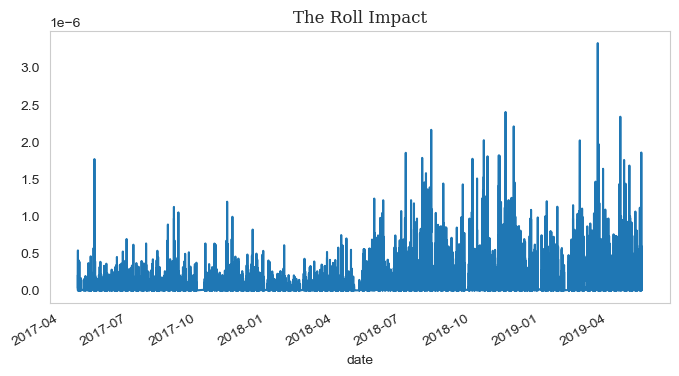

In [10]:
roll_impact.plot(figsize = (8, 4), grid = False)
plt.title("The Roll Impact", fontsize = 12, fontfamily = 'Serif')

#### 5. Becker Parkinson Volatility Estimator

low, high series를 이용해서 Corwin-Schultz spread를 추정하라. 추정된 spread를 이용해 becker parkinson 변동성 추정량도 추정 가능하다. 스프레드가 벌어질수록 변동성이 커진다는 것은 어떻게 해석할 수 있을까?

In [11]:
spread = ms.CorwinSchultz(high = stock.high, low = stock.low)

In [12]:
cs_estimator = spread.corwin_schultz_estimator(window = 20)
cs_estimator.dropna().head()

date
2017-04-24 09:22:00    0.000297
2017-04-24 09:23:00    0.001473
2017-04-24 09:24:00    0.000297
2017-04-24 09:25:00    0.001430
2017-04-24 09:26:00    0.001385
Name: Spread, dtype: float64

Text(0.5, 1.0, 'Corwin Schultz Spread Estimator')

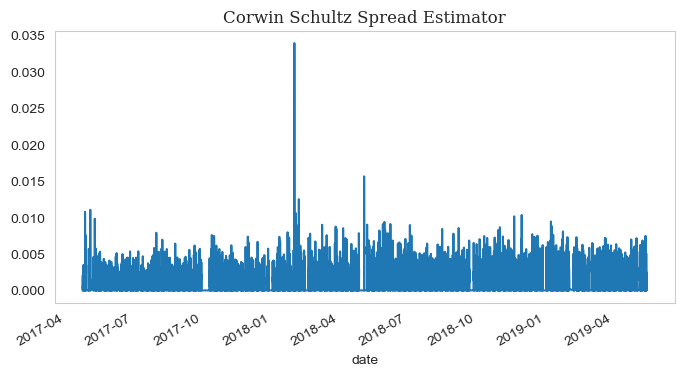

In [13]:
cs_estimator.dropna().plot(grid = False, figsize = (8, 4))
plt.title("Corwin Schultz Spread Estimator", fontsize = 12, fontfamily = 'Serif')

In [14]:
bp_vol = spread.becker_parkinson_vol(window = 20)
bp_vol.dropna().head()

date
2017-04-24 09:22:00    0.000516
2017-04-24 09:23:00    0.000000
2017-04-24 09:24:00    0.000516
2017-04-24 09:25:00    0.000000
2017-04-24 09:26:00    0.000000
dtype: float64

Text(0.5, 1.0, 'Becker Parkinson Volatility Estimator')

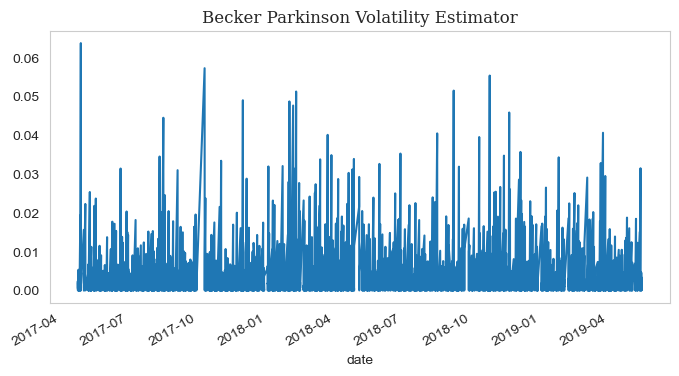

In [15]:
bp_vol.dropna().plot(grid = False, figsize = (8, 4))
plt.title("Becker Parkinson Volatility Estimator", fontsize = 12, fontfamily = 'Serif')

#### 6. Kalman Filtering and GARCH Models

Becker Parkinson Volatility Estimator를 Kalman Filtering하여 적합화하면 $\mathrm{GARCH}$ 변동성 추정치와 비슷해진다. 8주차와 9주차에서 Kalman filtering과 GARCH 모형을 가져와 두 추정치를 비교하라. 여기서 Kalman Filtering은 Becker Parkinson 변동성 추정치에 적용하고, GARCH 모형은 일별 가격 계열에 대해 적용한다

두 추정치는 비슷한 양상을 띄고 있는가? Becker Parkinson 변동성 추정치는 고빈도 데이터에서의 변동성 추정량으로써 설득력이 있는가?

In [16]:
import pandas_datareader as pdr
import datetime

start_date = datetime.datetime(2017, 4, 21)
end_date = datetime.datetime(2019, 5, 15)
samsung = pdr.DataReader("005930", "naver", start_date, end_date).astype(int)

In [17]:
ret = np.log(samsung.Close / samsung.Close.shift(1)).dropna()
ret.head()

Date
2017-04-24    0.011707
2017-04-25    0.034790
2017-04-26    0.002339
2017-04-27    0.024009
2017-04-28    0.017636
Name: Close, dtype: float64

In [18]:
import arch

garch_model1 = arch.arch_model(np.log(stock.close / stock.close.shift(1)).dropna(), vol = 'GARCH', p = 1, q = 2)
result1 = garch_model1.fit()
print(result1.summary())

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.041e-06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: -1053480.8918303656
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -1053480.8915064305
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1


/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:            1.05348e+06
Distribution:                  Normal   AIC:                      -2.10695e+06
Method:            Maximum Likelihood   BIC:                      -2.10690e+06
                                        No. Observations:               188724
Date:                Wed, Nov 01 2023   Df Residuals:                   188723
Time:                        16:50:13   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.7084e-07  8.705e-07      0.196      0.844 

Text(0.5, 1.0, 'Volatility Estimator')

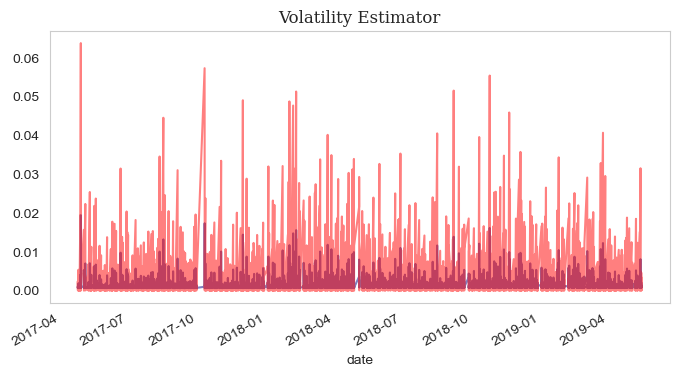

In [19]:
plt.figure(figsize = (8,4))
result1.conditional_volatility.plot(color = 'navy', alpha = 0.5)
bp_vol.plot(color = 'red', alpha = 0.5)
plt.grid(False)
plt.title('Volatility Estimator', fontfamily = 'Serif', fontsize = 12)

#### 7. Bar Sampling

Samsung Electronics High Frequency Data에 대해서 다음을 추정하라

**7.1 Tick Bar Sampling**

주어진 데이터에 대해 Tick count Sampling을 진행하라. 여기서 Tick의 `threshold = 150`이다

In [20]:
tick = ms.BarSampling(stock, 'close', threshold = 150, tick = True).dropna()
tick

,open,high,low,close,volume,sell,buy,kospi,dollar_value
date,,,,,,,,,
2017-04-24 11:31:00,41060,41060,41040,41040,6100,4350.0,1750.0,2170.469971,250344000
2017-04-24 14:01:00,41020,41040,41020,41040,11000,2850.0,8150.0,2167.080078,451440000
2017-04-25 10:11:00,41840,41860,41800,41820,33600,28550.0,5050.0,2176.139893,1405152000
2017-04-25 12:41:00,42100,42100,42060,42060,44200,36500.0,7700.0,2184.790039,1859052000
2017-04-25 15:11:00,42700,42700,42680,42680,38750,9550.0,29200.0,2196.110107,1653850000
...,...,...,...,...,...,...,...,...,...
2019-05-14 11:16:00,42550,42600,42550,42600,10661,4384.0,6277.0,2084.080078,454158600
2019-05-14 13:46:00,42850,42850,42800,42800,6361,1953.0,4408.0,2083.110107,272250800
2019-05-15 09:56:00,42800,42800,42700,42750,17818,14839.0,2979.0,2088.870117,761719500


**7.2 Volume Bar Sampling**

주어진 데이터에 대해서 Volume count Sampling을 진행하라. 여기서 Volume의 `threshold = 1000000`이다

In [21]:
volume = ms.BarSampling(stock, column = 'volume', threshold = 1000000)
volume

,open,high,low,close,volume,sell,buy,kospi,dollar_value
date,,,,,,,,,
2017-04-24 09:48:00,41180,41220,41180,41180,88350,16350.0,72000.0,2174.050049,3638253000
2017-04-24 10:39:00,41080,41120,41080,41080,26700,3450.0,23250.0,2169.459961,1096836000
2017-04-24 11:57:00,41040,41100,41040,41060,12850,3200.0,9650.0,2170.870117,527621000
2017-04-24 14:04:00,41060,41100,41060,41100,20300,2550.0,17750.0,2169.229980,834330000
2017-04-24 15:04:00,41160,41180,41140,41180,46700,2950.0,43750.0,2171.290039,1923106000
...,...,...,...,...,...,...,...,...,...
2019-05-15 10:10:00,42750,42750,42700,42750,45174,42315.0,2859.0,2088.479980,1931188500
2019-05-15 11:12:00,42950,43000,42950,43000,6561,5134.0,1427.0,2093.899902,282123000
2019-05-15 12:46:00,42900,42950,42900,42950,4786,2081.0,2705.0,2096.290039,205558700


**7.3 Dollar Value Bar Sampling**

주어진 데이터에 대해서 Dollar Value count Sampling을 진행하라. 여기서 Dollar Value의 `threshold = 10e9`이다

In [22]:
dollar = ms.BarSampling(stock, column = 'dollar_value', threshold = 10e9)
dollar

,open,high,low,close,volume,sell,buy,kospi,dollar_value
date,,,,,,,,,
2017-04-24 09:11:00,41120,41120,41040,41060,47000,38850.0,8150.0,2172.790039,1929820000
2017-04-24 09:23:00,41040,41060,41020,41040,23700,5150.0,18550.0,2173.060059,972648000
2017-04-24 09:38:00,41080,41080,41040,41040,31050,24700.0,6350.0,2172.629883,1274292000
2017-04-24 09:48:00,41180,41220,41180,41180,88350,16350.0,72000.0,2174.050049,3638253000
2017-04-24 09:58:00,41220,41240,41220,41220,36400,7650.0,28750.0,2173.860107,1500408000
...,...,...,...,...,...,...,...,...,...
2019-05-15 14:21:00,42900,42900,42850,42900,3191,1007.0,2184.0,2093.709961,136893900
2019-05-15 14:42:00,42850,42900,42800,42900,81348,5008.0,76340.0,2094.500000,3489829200
2019-05-15 15:02:00,42850,42850,42750,42750,110882,107438.0,3444.0,2094.969971,4740205500


**7.4 Sample Distribution**

Time, Tick, Volume, Dollar로 표본추출된 샘플에 대해서 Histogram을 plotting하라. 어느 추출법을 통해 얻은 sample bar가 Normal Distribution에 가깝게 추출되었는가?

In [23]:
time_ret = np.log(stock.close / stock.close.shift(1)).dropna()
tick_ret = np.log(tick.close / tick.close.shift(1)).dropna()
volume_ret = np.log(volume.close / volume.close.shift(1)).dropna()
dollar_ret = np.log(dollar.close / dollar.close.shift(1)).dropna()

In [24]:
time_norm = (time_ret - time_ret.mean()) / time_ret.std() 
tick_norm = (tick_ret - tick_ret.mean()) / tick_ret.std()
volume_norm = (volume_ret - volume_ret.mean()) / volume_ret.std()
dollar_norm = (dollar_ret - dollar_ret.mean()) / dollar_ret.std()

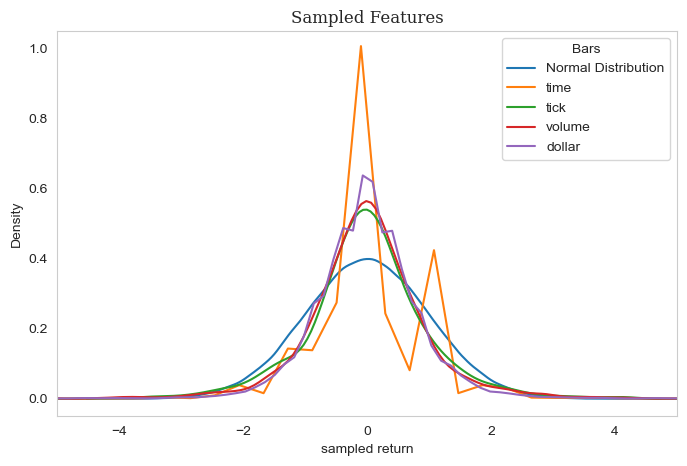

In [25]:
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")

plt.figure(figsize=(8,5))
sns.distplot(np.random.normal(size=200000), kde = True, label = 'Normal Distribution', hist=False)
sns.distplot(time_norm, label="time", kde=True, hist=False)
sns.distplot(tick_norm, label="tick", kde=True, hist=False)
sns.distplot(volume_norm, label="volume", kde=True, hist=False)
sns.distplot(dollar_norm, label="dollar", kde=True, hist=False)
plt.legend(title="Bars")
plt.grid(False)
plt.xlim([-5, 5])
plt.xlabel('sampled return')
plt.ylim([-0.05, 1.05])
plt.title('Sampled Features', fontsize = 12, fontfamily = 'Serif')

plt.show()

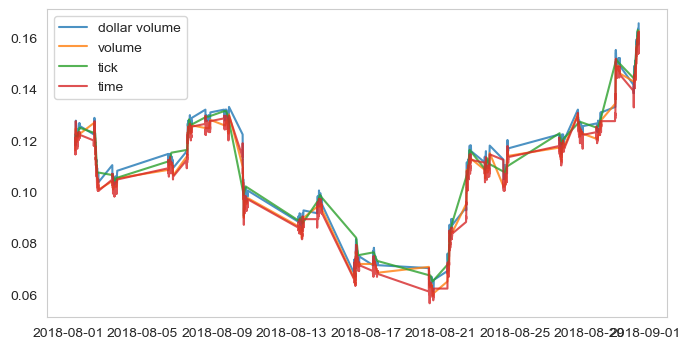

In [26]:
plt.figure(figsize = (8,4))
plt.plot(dollar_ret.cumsum()['2018-08'], alpha = 0.8, label = 'dollar volume')
plt.plot(volume_ret.cumsum()['2018-08'], alpha = 0.8, label = 'volume')
plt.plot(tick_ret.cumsum()['2018-08'], alpha = 0.8, label = 'tick')
plt.plot(time_ret.cumsum()['2018-08'], alpha = 0.8, label = 'time')
plt.legend()
plt.grid(False)